# Rating Prediction

## Problem Description

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

## Importing Modules

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [106]:
df = pd.read_csv('rating.csv')
df.head()

,Rating,Review
0,3,"Def not best, but not worst"
1,1,Text Messaging Doesn't Work
2,5,Love This Phone
3,3,"Love the Phone, BUT...!"
4,4,"Great phone service and options, lousy case!"


In [107]:
df.shape

(20602, 2)

In [108]:
print('Ratings count','\n',df.Rating.value_counts())

Ratings count 
 4       8218
5       4850
Null    3970
3       1599
1       1392
2        573
Name: Rating, dtype: int64


We have to replace Null value with nan remove.

In [110]:
df.replace('Null', np.nan, inplace=True)

## Data cleaning and Prepration

### Removing null values

In [111]:
df.isnull().sum()

Rating    3970
Review    4899
dtype: int64

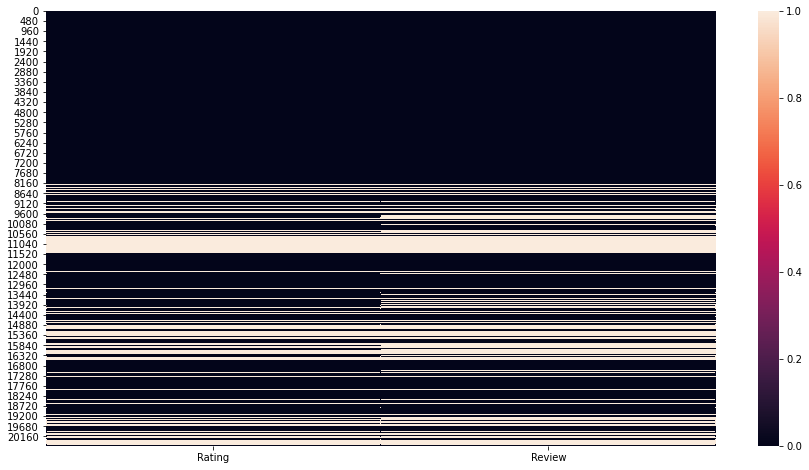

In [112]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

Since we will be working on Sentiment Analysis based on the 'Review', there is no way for us to fill in the missing data. Let's drop it from the dtaaframe.

In [113]:
df.dropna(inplace=True)

In [114]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

### Removing punctuation

In [115]:
# removing punctuation

df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

### Calculating polarity

* Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.
* Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis.

In [116]:
# Calculating polarity

from textblob import TextBlob
df["Polarity"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [117]:
df["Review Length"] = df["Review"].apply(lambda x: len(x))
df["Word Count"] = df["Review"].apply(lambda x: len(x.split()))

In [118]:
df.head()

,Rating,Review,Polarity,Review Length,Word Count
0,3,Def not best but not worst,0.00,27,6
1,1,Text Messaging Doesn t Work,0.00,27,5
2,5,Love This Phone,0.50,15,3
3,3,Love the Phone BUT,0.50,23,4
4,4,Great phone service and options lousy case,0.15,44,7


## Data Visualization

<AxesSubplot:xlabel='Polarity', ylabel='Density'>

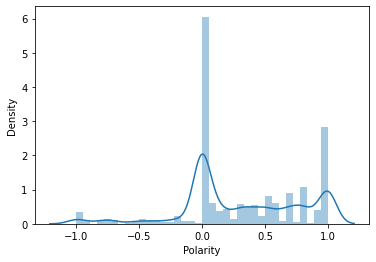

In [119]:
sns.distplot(df['Polarity'])

Let's first take a look at the distribution of sentiment polarity in this dataset. To be clear, a polarity of 1 is overwhelmingly positive, a polarity of -1 is overwhelmingly negative and a polarity of 0 is neutral.

<AxesSubplot:ylabel='Rating'>

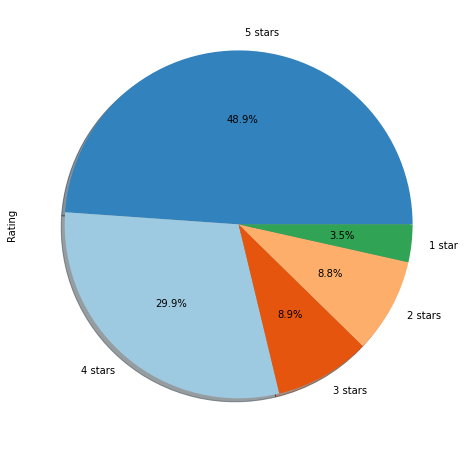

In [120]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2))

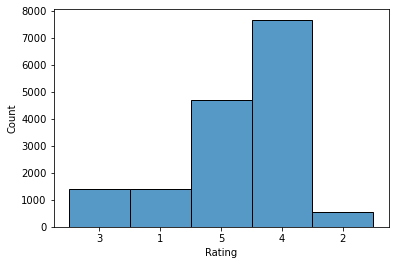

In [125]:
sns.histplot(df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

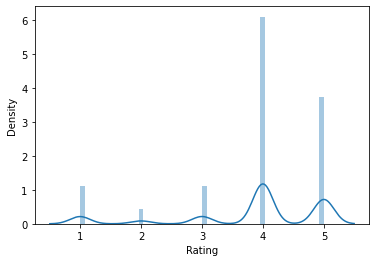

In [126]:
sns.distplot(df['Rating'])

We can see the number of rating from the above diagram.

#### uni-gram, bi-gram and tri-gram analysis

Let's create a function that can read in a list of words and return us the top n numbers of words and their frequencies.

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_words(x, n):
    vectorizer = CountVectorizer().fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [130]:
top_n_words(df["Review"], 20)

[('phone', 2424),
 ('stars', 1529),
 ('product', 1438),
 ('the', 1346),
 ('great', 1242),
 ('good', 1220),
 ('five', 1054),
 ('it', 871),
 ('awesome', 766),
 ('not', 710),
 ('for', 684),
 ('terrific', 581),
 ('purchase', 560),
 ('and', 517),
 ('this', 499),
 ('best', 493),
 ('is', 470),
 ('money', 465),
 ('nice', 443),
 ('buy', 422)]

Top 20 words in the review using uni-gram.

In [131]:
def top_n_bigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(2,2)).fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [132]:
top_n_bigrams(df["Review"], 20)

[('five stars', 1052),
 ('great phone', 427),
 ('terrific purchase', 334),
 ('simply awesome', 313),
 ('perfect product', 281),
 ('four stars', 269),
 ('this phone', 261),
 ('great product', 261),
 ('must buy', 246),
 ('worth every', 243),
 ('every penny', 243),
 ('classy product', 237),
 ('in the', 220),
 ('one star', 218),
 ('highly recommended', 214),
 ('just wow', 209),
 ('the market', 203),
 ('best in', 188),
 ('mind blowing', 181),
 ('blowing purchase', 180)]

Top 20 words in the review using bi-gram.

In [133]:
def top_n_trigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(3,3)).fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [135]:
top_n_trigrams(df["Review"], 20)

[('worth every penny', 243),
 ('in the market', 192),
 ('best in the', 187),
 ('mind blowing purchase', 180),
 ('good quality product', 143),
 ('value for money', 141),
 ('worth the money', 122),
 ('waste your money', 84),
 ('don waste your', 82),
 ('does the job', 78),
 ('worst experience ever', 77),
 ('love this phone', 75),
 ('did not meet', 75),
 ('not meet expectations', 75),
 ('waste of money', 71),
 ('could be way', 54),
 ('be way better', 54),
 ('for the price', 45),
 ('not recommended at', 45),
 ('recommended at all', 45)]

Top 20 words in the review using tri-gram.

#### Creating word cloud of the different rating

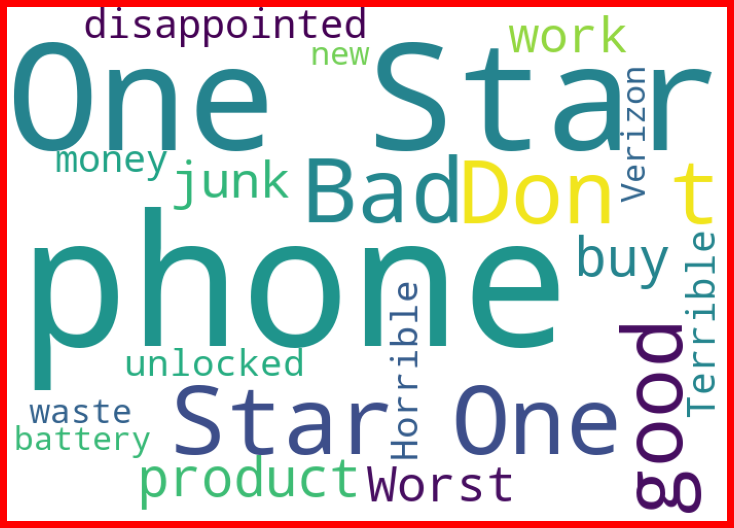

In [182]:
from wordcloud import WordCloud

one_star = df['Review'][df['Rating']=='1']

cloud_1 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(one_star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

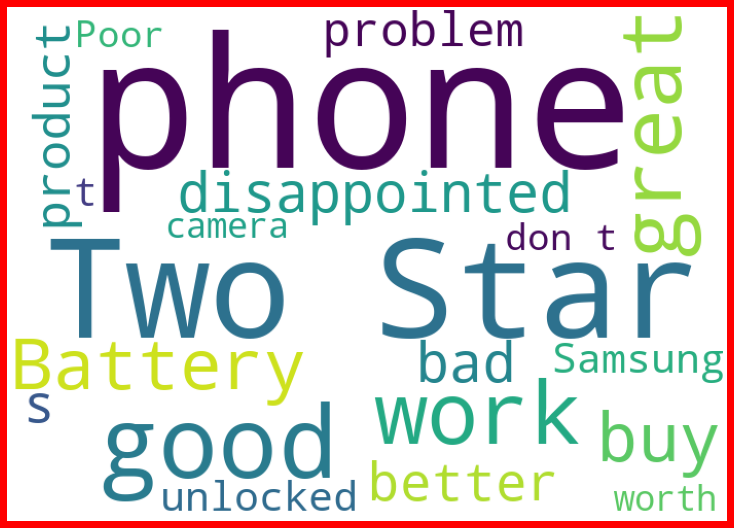

In [181]:
from wordcloud import WordCloud

two_star = df['Review'][df['Rating']=='2']

cloud_2 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(two_star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud_2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

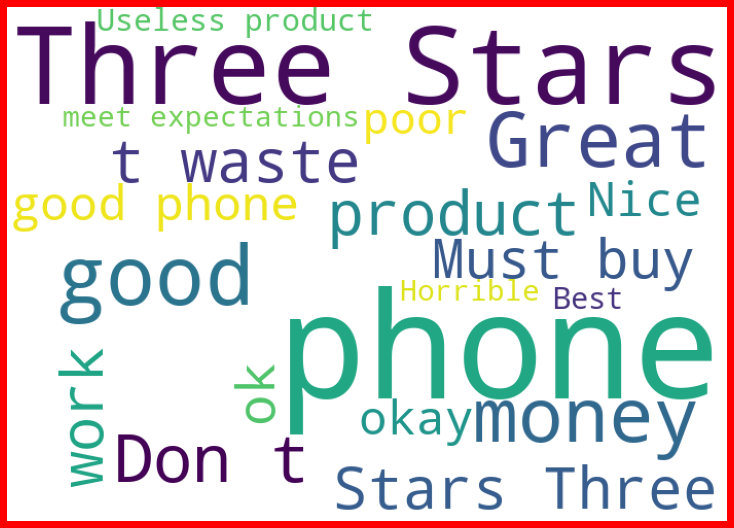

In [184]:
from wordcloud import WordCloud

three_star = df['Review'][df['Rating']=='3']

cloud_3 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(three_star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud_3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

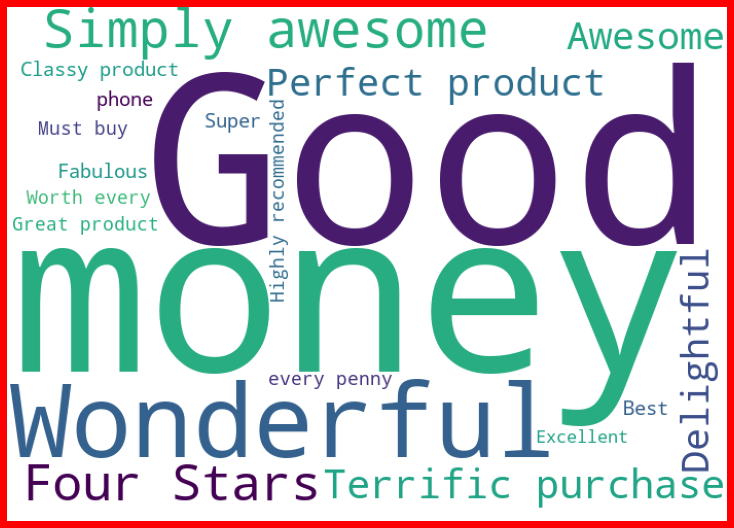

In [185]:
from wordcloud import WordCloud

four_star = df['Review'][df['Rating']=='4']

cloud_4 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(four_star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud_4)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

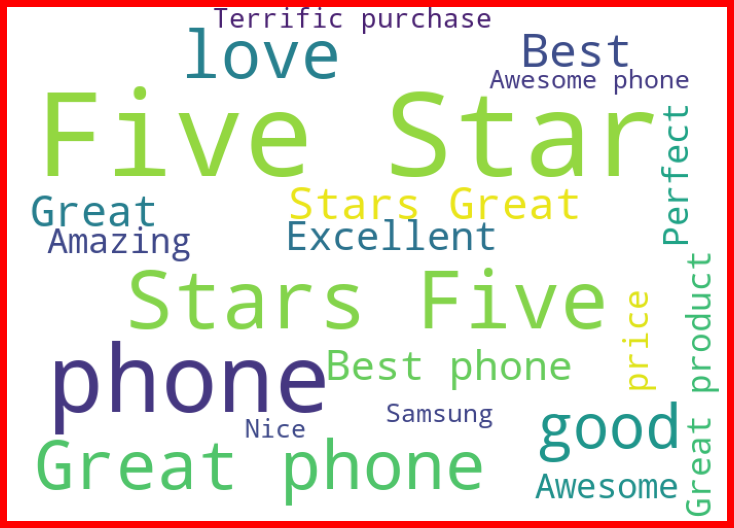

In [186]:
from wordcloud import WordCloud

five_star = df['Review'][df['Rating']=='5']

cloud_5 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(five_star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud_5)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Model Development

### Using MultinomialNB

In [205]:
#1. convert text into vectors using TF-IDF
#2. Instatiate MutlinomialNB classifier
#3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['Review'])

X = features
y = df['Rating']

In [245]:
#Train and Predict
X_train, x_test, Y_train, y_test = train_test_split(X, y, random_state=42)

naive.fit(X_train, Y_train)

pred = naive.predict(x_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, pred)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, pred, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, pred, average='macro')*100))
print('Classification Report:','\n', classification_report(y_test, pred))

Accuracy Score: 70.05
Recall Score: 44.89
Precision Score: 75.63
Classification Report: 
               precision    recall  f1-score   support

           1       0.71      0.41      0.52       356
           2       0.93      0.11      0.19       131
           3       0.76      0.10      0.17       377
           4       0.71      0.89      0.79      1901
           5       0.67      0.74      0.71      1161

    accuracy                           0.70      3926
   macro avg       0.76      0.45      0.48      3926
weighted avg       0.71      0.70      0.66      3926



### Using K-Nearest Neighbors

In [246]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred_knn = knn.predict(x_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, pred_knn)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, pred_knn, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, pred_knn, average='macro')*100))
print('Classification Report:','\n', classification_report(y_test, pred_knn))

Accuracy Score: 69.46
Recall Score: 45.30
Precision Score: 61.85
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.38      0.50       356
           2       0.48      0.11      0.19       131
           3       0.48      0.14      0.21       377
           4       0.76      0.85      0.80      1901
           5       0.61      0.79      0.69      1161

    accuracy                           0.69      3926
   macro avg       0.62      0.45      0.48      3926
weighted avg       0.68      0.69      0.66      3926



### Using Decision Tree 

In [249]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
pred_tree = tree.predict(x_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, pred_tree)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, pred_tree, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, pred_tree, average='macro')*100))
print('Classification Report:','\n', classification_report(y_test, pred_tree))

Accuracy Score: 68.72
Recall Score: 47.06
Precision Score: 51.32
Classification Report: 
               precision    recall  f1-score   support

           1       0.53      0.50      0.52       356
           2       0.20      0.15      0.17       131
           3       0.39      0.16      0.23       377
           4       0.75      0.87      0.81      1901
           5       0.69      0.67      0.68      1161

    accuracy                           0.69      3926
   macro avg       0.51      0.47      0.48      3926
weighted avg       0.66      0.69      0.67      3926



### Using Random Forest

In [250]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(x_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, pred_rfc)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, pred_rfc, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, pred_rfc, average='macro')*100))
print('Classification Report:','\n', classification_report(y_test, pred_rfc))

Accuracy Score: 72.31
Recall Score: 49.40
Precision Score: 64.66
Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.55      0.59       356
           2       0.50      0.11      0.19       131
           3       0.64      0.14      0.23       377
           4       0.78      0.87      0.82      1901
           5       0.67      0.80      0.73      1161

    accuracy                           0.72      3926
   macro avg       0.65      0.49      0.51      3926
weighted avg       0.71      0.72      0.69      3926



### Using AdaBoost

In [251]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
pred_ada = ada.predict(x_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, pred_ada)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, pred_ada, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, pred_ada, average='macro')*100))
print('Classification Report:','\n', classification_report(y_test, pred_ada))

Accuracy Score: 65.77
Recall Score: 41.07
Precision Score: 79.37
Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.33      0.44       356
           2       1.00      0.11      0.19       131
           3       1.00      0.10      0.18       377
           4       0.64      0.88      0.74      1901
           5       0.68      0.63      0.65      1161

    accuracy                           0.66      3926
   macro avg       0.79      0.41      0.44      3926
weighted avg       0.70      0.66      0.62      3926



### Checking Cross Validation Score

In [253]:
#importing cross val score module
from sklearn.model_selection import cross_val_score
# imporing kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [264]:
# using cross val for MultinomialNB model.
naive_cv = cross_val_score(MultinomialNB(), X, y, cv=kfold, scoring='accuracy')
result = np.absolute(naive_cv.mean())
print("Result: {:.2f}".format(result*100))

Result: 69.46


In [265]:
# using cross val for K-Nearest Neighbors model.
knn_cv = cross_val_score(KNeighborsClassifier(), X, y, cv=kfold, scoring='accuracy')
result = np.absolute(knn_cv.mean())
print("Result: {:.2f}".format(result*100))

Result: 68.18


In [267]:
# using cross val for Decision tree model.
tree_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=kfold, scoring='accuracy')
result = np.absolute(tree_cv.mean())
print("Result: {:.2f}".format(result*100))

Result: 69.87


In [272]:
# using cross val for Random Forest model.
rfc_cv = cross_val_score(RandomForestClassifier(), X, y, cv=kfold, scoring='accuracy')
result = np.absolute(rfc_cv.mean())
print("Result: {:.2f}".format(result*100))

Result: 72.20


In [271]:
# using cross val for AdaBoost classifier model.
ada_cv = cross_val_score(AdaBoostClassifier(), X, y, cv=kfold, scoring='accuracy')
result = np.absolute(ada_cv.mean())
print("Result: {:.2f}".format(result*100))

Result: 62.56


* Here our Random Forest Classification model perfoms better as compare to others.
* The difference between the normal model score and the cross validation score is least for Random Forest Classification from all the models.
* Now we will do hyper parameter tuning of our selected model.

## Hyperparameter tuning

In [273]:
# importing grid search cv
from sklearn.model_selection import GridSearchCV

In [274]:
# creating parameters for the tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [277]:
GCV = GridSearchCV(RandomForestClassifier(), random_grid, cv=5)
GCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 11, 14, 17, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 136, 172, 209, 245, 281, 318,
                                          354, 390, 427, 463, 500]})

In [278]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 136}

In [282]:
rfrGCV = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, n_estimators=136)
rfrGCV.fit(X_train, Y_train)
predGCV = rfrGCV.predict(x_test)
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, predGCV)*100))

Accuracy Score: 64.72


## Checking how much our predictions are correct

In [283]:
predictions = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [284]:
predictions.head()

,Predictions,Real Value
1270,4,1
5758,5,4
19225,4,3
19901,4,4
4935,4,5


## Saving our model

In [285]:
# importing joblib
import joblib
joblib.dump(rfrGCV, 'Rating_Prediction.pkl')

['Rating_Prediction.pkl']

### Loading saved model

In [293]:
save = joblib.load('Rating_Prediction.pkl')
prediction = save.predict(x_test)
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, predGCV)*100))
print('Recall Score: {:.2f}'.format(recall_score(y_test, predGCV, average='macro')*100))
print('Precision Score: {:.2f}'.format(precision_score(y_test, predGCV, average='macro')*100))
print('Classification Report:','\n',classification_report(y_test, predGCV))

Accuracy Score: 64.72
Recall Score: 35.21
Precision Score: 67.00
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.16      0.28       356
           2       0.00      0.00      0.00       131
           3       1.00      0.10      0.17       377
           4       0.60      0.95      0.74      1901
           5       0.76      0.56      0.65      1161

    accuracy                           0.65      3926
   macro avg       0.67      0.35      0.37      3926
weighted avg       0.70      0.65      0.59      3926



In [294]:
prediction

array(['4', '5', '4', ..., '4', '4', '4'], dtype=object)